In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [22]:
def my_mul(M, N):
    rows = M.shape[0]
    cols = N.shape[1]
    A = np.zeros((rows, cols))

    if rows != cols:
        print("Not Compatible")
        return
    else:
        for i in range(0, rows):
            for j in range(0, cols):
                A[i][j] = sum(M[i, :] * N[:, j])
    
    return A
    

In [23]:
np_time = []
my_time = []
for i in range(10, 101, 10):
    M = np.random.rand(i, i)

    st = time.time()
    A = np.matmul(M, M)
    time.sleep(2)
    et = time.time()
    np_time.append(et-st-2)

    st = time.time()
    A = my_mul(M, M)
    time.sleep(2)
    et = time.time()
    my_time.append(et-st-2)

In [24]:
print("numpy:", np_time)
print("my_algo:", my_time)

numpy: [0.00542140007019043, 0.012035131454467773, 0.0033767223358154297, 0.01576066017150879, 0.0017087459564208984, 0.007324695587158203, 0.008155584335327148, 0.0031621456146240234, 0.0072078704833984375, 0.010735034942626953]
my_algo: [0.009645938873291016, 0.016428709030151367, 0.025419235229492188, 0.05086803436279297, 0.07575273513793945, 0.06383442878723145, 0.07593917846679688, 0.20526385307312012, 0.1840975284576416, 0.14990544319152832]


Text(0.5, 1.0, 'Numpy vectorization v/s My Algorithm')

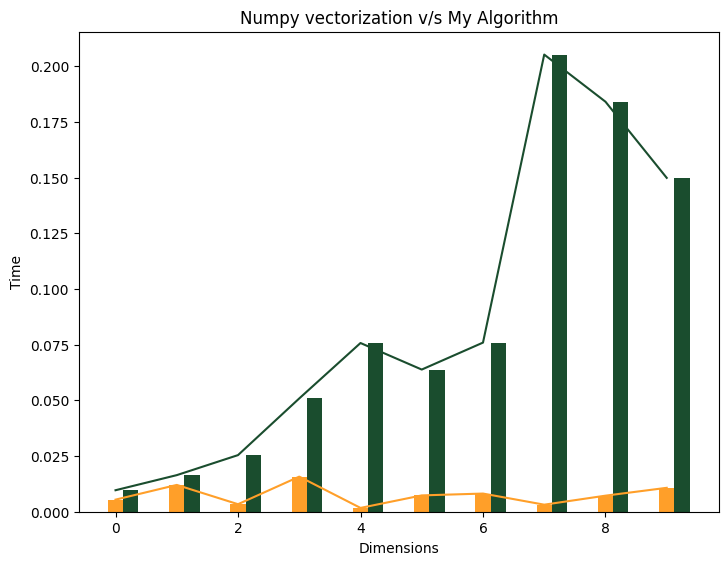

In [25]:
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.00, np_time, color='#FF9F29', width=0.25)
ax.bar(X + 0.25, my_time, color='#1A4D2E', width=0.25)
ax.plot(X, np_time, color='#FF9F29')
ax.plot(X, my_time, color='#1A4D2E')

plt.xlabel("Dimensions")
plt.ylabel("Time")
plt.title("Numpy vectorization v/s My Algorithm")